## Periodogram and phased lightcurve  

N. Gosnell  
Jan 25, 2021  

I'm going to try to make a periodogram and phased lightcurve at the primary period and harmonic to motivate our Rsini discussion. Let's goooooooo....

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [33]:
#read in C5 data
df5 = pd.read_csv('../../data/K2/S1063_K2_C05_lightkurve_SFF.csv')
df16 = pd.read_csv('../../data/K2/S1063_K2_C16_lightkurve_SFF.csv')
df18 = pd.read_csv('../../data/K2/S1063_K2_C18_lightkurve_SFF.csv')

In [36]:
df18

,time,flux
0,3418.546541,73985.342160
1,3418.566974,73994.532839
2,3418.587406,73981.014196
3,3418.607838,73971.104432
4,3418.628271,73989.037345
...,...,...
2366,3469.299388,73624.953833
2367,3469.319820,73611.867689
2368,3469.340251,73629.043756
2369,3469.360683,73632.653342


In [37]:
normflux5 = np.array(df5.flux / np.max(df5.flux))

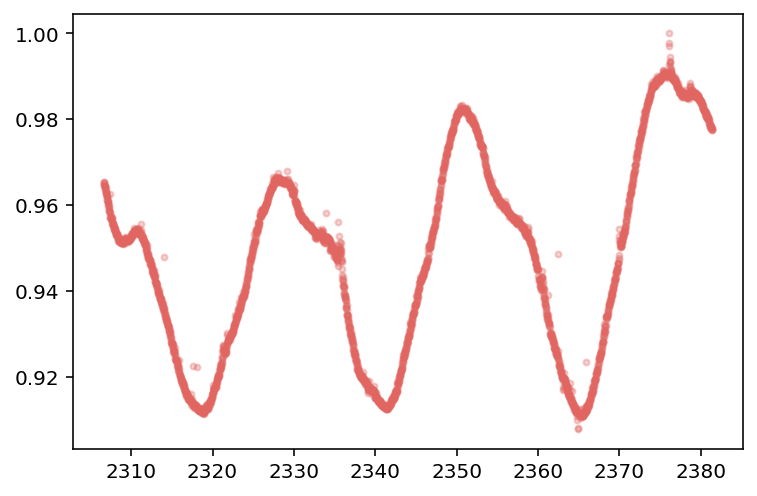

In [38]:
plt.plot(df5.time, normflux5, '.', alpha=0.3, color='#E16560')

In [40]:
alltime = np.concatenate((df5.time,df16.time,df18.time))
allflux = np.concatenate((df5.flux,df16.flux,df18.flux))

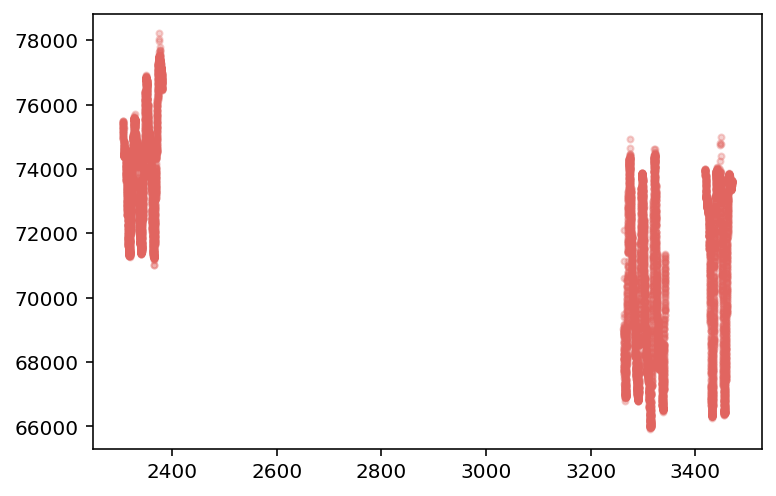

In [41]:
plt.plot(alltime, allflux, '.', alpha=0.3, color='#E16560')

In [87]:
frequency = np.linspace(0.01, 0.1, 500)
power = LombScargle(df5.time, df5.flux).power(frequency)
#frequency, power = LombScargle(df5.time, df5.flux).autopower()

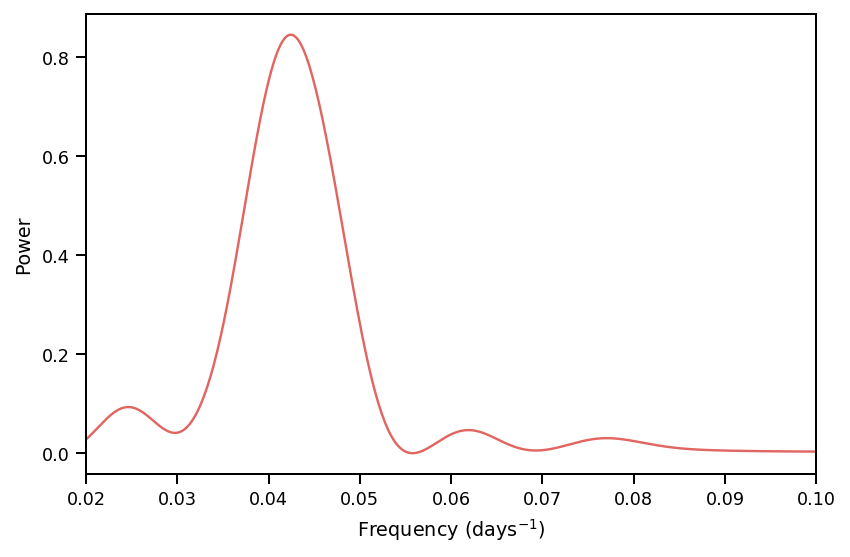

In [152]:
sns.set_context('paper')
plt.plot(frequency, power, color='#E16560') 
plt.xlim(0.02,0.1)
plt.xlabel(r'Frequency (days$^{-1}$)')
plt.ylabel("Power")
plt.tight_layout()
plt.savefig("../../document/figures/C5_Periodogram.pdf", dpi=300, transparent=True);

In [99]:
best_frequency = frequency[np.argmax(power)]
period = 1.0 / best_frequency
period

23.54884379424257

In [96]:
period = 1.0 / best_frequency
period

23.54884379424257

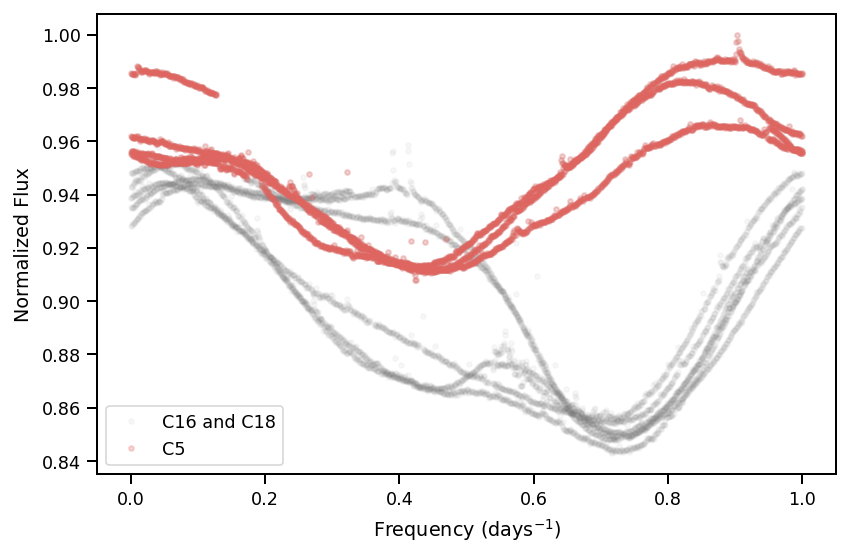

In [151]:
plt.plot(np.mod(alltime, period) / period, (allflux/np.max(allflux)), '.', alpha=0.05, color='gray', label="C16 and C18")
plt.plot(np.mod(df5.time, period) / period, normflux5, '.', alpha=0.25, color='#E16560', label="C5")
plt.xlabel(r'Frequency (days$^{-1}$)')
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()
plt.savefig("../../document/figures/Phased_K2_lightcurve.pdf", dpi=300, transparent=True);

In [102]:
from scipy.signal import argrelextrema

In [113]:
max_powers = argrelextrema(power, np.greater)
freq_of_max_powers = frequency[max_powers]
freq1 = freq_of_max_powers[0]
freq2 = freq_of_max_powers[2]
freq3 = freq_of_max_powers[3]

In [117]:
harmonic1_period = 1.0 / freq1
print(harmonic1_period)
harmonic2_period = 1.0 / freq2
print(harmonic2_period)
harmonic3_period = 1.0 / freq3
print(harmonic3_period)

40.63517915309446
16.143642834034292
12.971146347803483


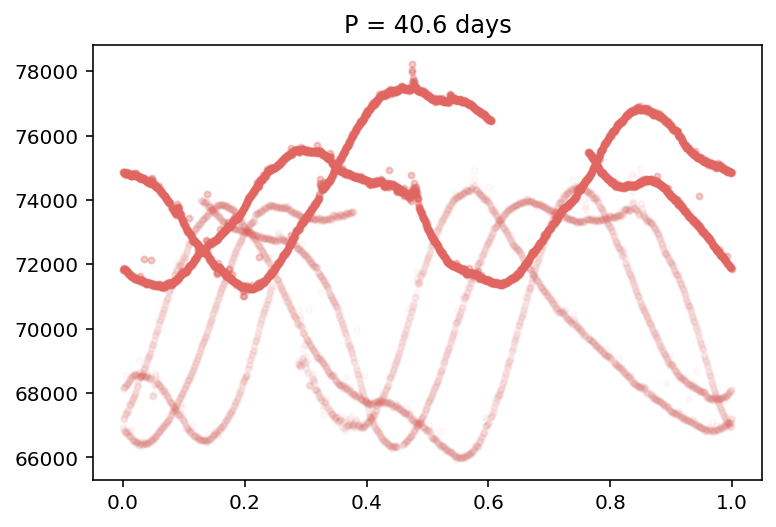

In [119]:
plt.plot(np.mod(df5.time, harmonic1_period) / harmonic1_period, df5.flux, '.', alpha=0.3, color='#E16560')
plt.plot(np.mod(alltime, harmonic1_period) / harmonic1_period, allflux, '.', alpha=0.03, color='#E16560')
plt.title("P = 40.6 days");

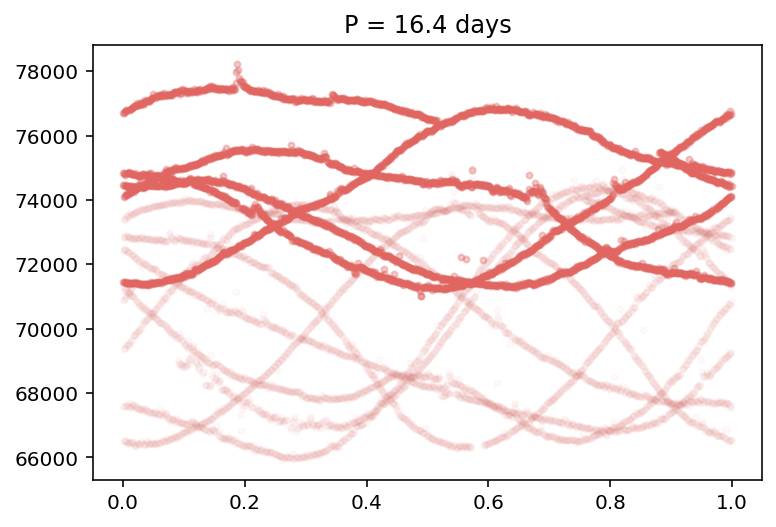

In [122]:
plt.plot(np.mod(df5.time, harmonic2_period) / harmonic2_period, df5.flux, '.', alpha=0.3, color='#E16560')
plt.plot(np.mod(alltime, harmonic2_period) / harmonic2_period, allflux, '.', alpha=0.03, color='#E16560')
plt.title("P = 16.4 days");

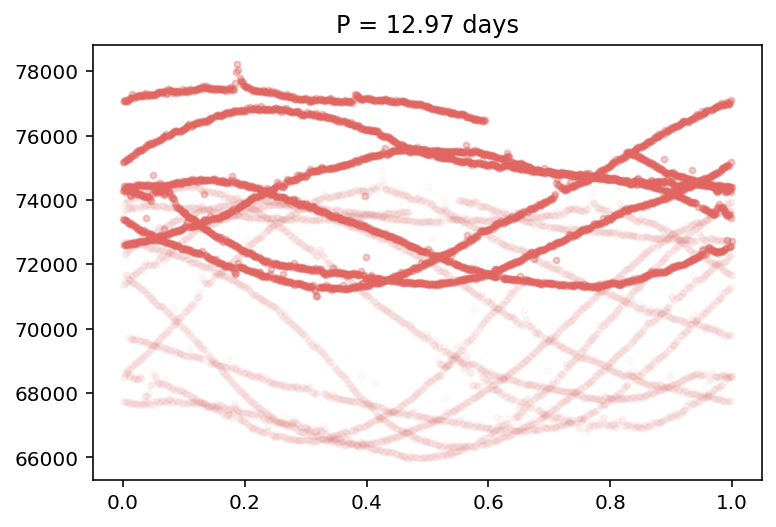

In [123]:
plt.plot(np.mod(df5.time, harmonic3_period) / harmonic3_period, df5.flux, '.', alpha=0.3, color='#E16560')
plt.plot(np.mod(alltime, harmonic3_period) / harmonic3_period, allflux, '.', alpha=0.03, color='#E16560')
plt.title("P = 12.97 days");

### Okay, from this I think it's pretty evident that P ~ 23.5 days is the rotation period, but the most spotted hemisphere shifted between C5 and C16-C18  

Let's check the periodograms for C16 and C18 separately...

In [153]:
frequency = np.linspace(0.01, 0.1, 500)
power_16 = LombScargle(df16.time, df16.flux).power(frequency)
power_18 = LombScargle(df18.time, df18.flux).power(frequency)

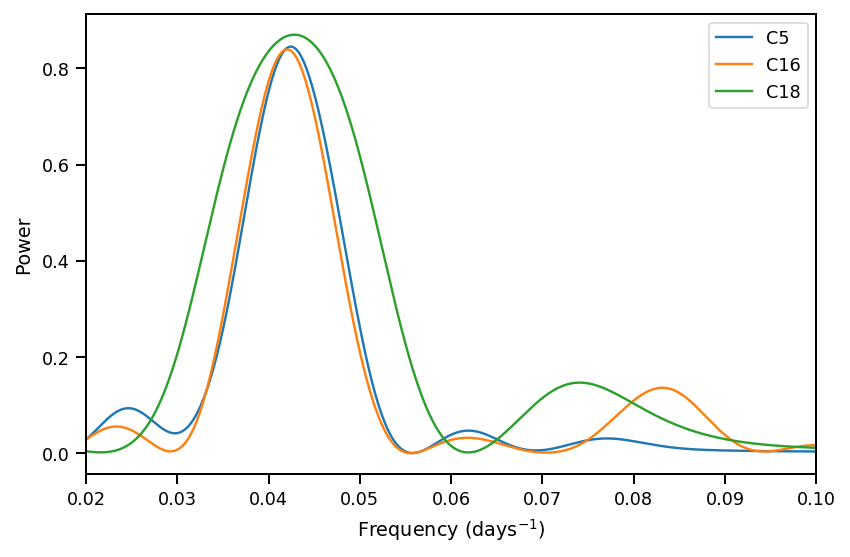

In [171]:
plt.plot(frequency, power, label="C5")
plt.plot(frequency, power_16, label="C16") 
plt.plot(frequency, power_18, label="C18")
plt.xlim(0.02,0.1)
plt.legend()
plt.xlabel(r'Frequency (days$^{-1}$)')
plt.ylabel("Power")
plt.tight_layout()
plt.savefig("../../document/figures/AllCampaigns_Periodogram.pdf", dpi=300, transparent=True);

In [157]:
best_frequency_16 = frequency[np.argmax(power_16)]
best_frequency_18 = frequency[np.argmax(power_18)]
period_16 = 1.0 / best_frequency_16
period_18 = 1.0 / best_frequency_18
print(period_16, period_18)

23.750594954783434 23.35049134300421


In [173]:
avgperiod = np.mean([period,period_16, period_18])
avgperiod

23.549976697343407

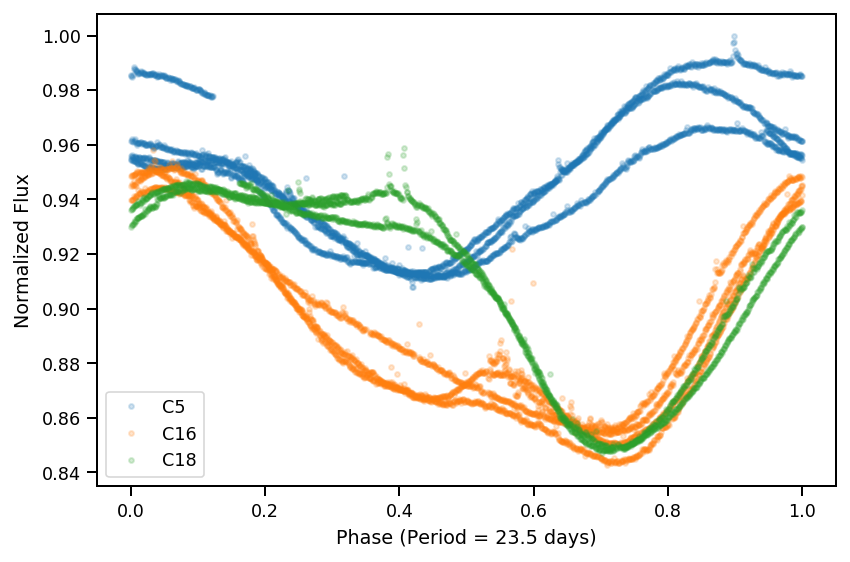

In [178]:
plt.plot(np.mod(df5.time, avgperiod) / avgperiod, (df5.flux/np.max(allflux)), '.', alpha=0.2, label="C5")
plt.plot(np.mod(df16.time, avgperiod) / avgperiod, (df16.flux/np.max(allflux)), '.', alpha=0.2, label="C16")
plt.plot(np.mod(df18.time, avgperiod) / avgperiod, (df18.flux/np.max(allflux)), '.', alpha=0.2, label="C18")
plt.legend()
plt.xlabel("Phase (Period = 23.5 days)")
plt.ylabel("Normalized Flux")
plt.tight_layout()
plt.savefig("../../document/figures/AllCampaigns_Phased_Lightcurve.pdf", dpi=300, transparent=True);